## Logistic Regression


In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams. This outline and the framework code in ex2.m will guide you through the exercise.

OUTLINE OF WHAT TO DO
1. Load Data
2. Plot Data
3. Compute sigmoid(z)
4. Computer cost_function(theta, X, y) => (3a) J(theta), (3b) Derivate of J(theta) w.t.r to each theta_j
5. Computer predict(theta, X) => {0, 1}
    Predict whether the label is 0 or 1, y = 1 iff sigmoid >= 0.5
6.  Compute cost and gradient for logistic regression with regularization TODO FINISH VIDz

### 0. IMPORT ALL DA THINGS

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import scipy.optimize as opt
from sklearn.linear_model import LogisticRegression

### 1. LOAD DATA

In [3]:
df = pd.read_csv('ex2data1.txt', header=None, names = ["Exam A Score", "Exam B Score", "Admitted"])

In [4]:
df.sample(10)

,Exam A Score,Exam B Score,Admitted
36,33.915500,98.869436,0
56,97.645634,68.861573,1
55,49.586677,59.808951,0
29,38.785804,64.995681,0
89,52.348004,60.769505,0
78,60.455556,42.508409,0
82,67.319257,66.589353,1
21,89.676776,65.799366,1
80,88.913896,69.803789,1
23,34.212061,44.209529,0


In [5]:
df.describe()

,Exam A Score,Exam B Score,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


## Plot Data

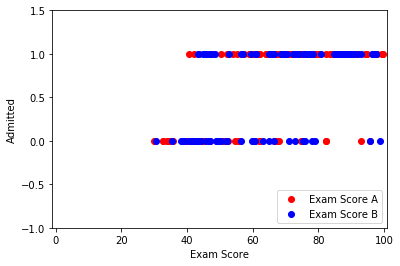

In [6]:
x_exam_a = df.values[:, 0]
x_exam_b = df.values[:, 1]
y = df.values[:, 2]

plt.scatter(x_exam_a, y, c='r', label='Exam Score A')
plt.scatter(x_exam_b, y, c='b', label='Exam Score B')

plt.xlim(-1,101)
plt.ylim(-1,1.5)
plt.xlabel('Exam Score')
plt.ylabel('Admitted');
plt.legend(loc=4);

Text(0,0.5,'Exam Score B')

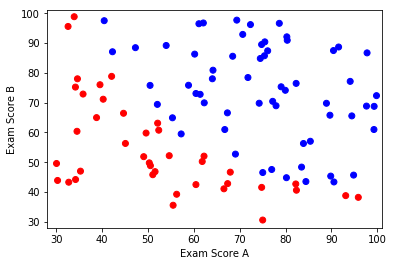

In [7]:
x_exam_a = df.values[:, 0]
x_exam_b = df.values[:, 1]
y = df.values[:, 2]

cols = ['r' if y[i] == 0 else 'b' for i, e in enumerate(x_exam_a)]
plt.scatter(x_exam_a, x_exam_b, c=cols)

plt.xlim(28,101)
plt.ylim(28,101)
plt.xlabel('Exam Score A')
plt.ylabel('Exam Score B')

## Compute sigmoid(z)

In [8]:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

In [9]:
## TEST FUNCTION
assert sigmoid(0) == .5

In [10]:
assert sigmoid(1) == 0.7310585786300049

In [11]:
assert sigmoid(-1) == 0.2689414213699951

## Compute cost(theta, X, y)

In [12]:
# X is design matrix
# Each row is a sample (so n by m) (n = # of features, m = # of samples)
# First column is all 1s for theta
original_samples = df.values[:, [0, 1]]
first_column = np.matrix('1 '*100).T
X = np.append(first_column, original_samples, 1)

# y is a m dimensional vector
# NOTE: You need to use matrix so np correctly shapes data
y = np.matrix(df.values[:, 2])

# theta is n+1 dimensional (+1 for element at index 0 which has no X)
theta = np.matrix('0 '*3)

# X.shape, theta.shape, y.shape

In [13]:
def cost(theta, X, y):
    X_theta = theta*X.T
    h = sigmoid(X_theta)
    m = y.size
    y_is_one = -y*np.log(h.T)
    y_is_zero = (y-1)*np.log((1-h).T)
    return np.asscalar((y_is_one + y_is_zero) / m)

In [14]:
# Test cost 0.69314718055994529
cost(theta, X, y)

0.6931471805599453

## Compute gradient

In [15]:
def gradient(theta, X, y):
    X_theta = theta*X.T
    h = sigmoid(X_theta)
    diff = h - y
    m = y.size
    return (diff*X)/m

In [16]:
# Test gradient array([ -0.1       , -12.00921659, -11.26284221])
gradient(theta, X, y)

matrix([[ -0.1       , -12.00921659, -11.26284221]])

## Get best theta using scipy

In [17]:
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.fmin_tnc.html
# (array([-25.87355624,   0.21193682,   0.20722586]), 51, 1)
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
theta = np.matrix('-25.87355624 0.21193682 0.20722586')
cost(theta, X, y)

0.20357134412017033

## Compute predict

In [18]:
# Predict whether the label is 0 or 1, y = 1 iff sigmoid >= 0.5
def predict(theta, X):
    return np.matrix([1 if p >= .5 else 0 for p in sigmoid(X*theta.T)])

predict(theta, X)

matrix([[0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
         1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
         1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
         0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
         1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1]])

## Compute accuracy

In [19]:
def accuracy(y_prime, y):
    y_prime = y_prime.T
    y = y.T
    return sum([.01 if y_prime[i] == y[i] else 0 for i in range(100)])

y_prime = predict(theta, X)
accuracy(y_prime, y)

0.8900000000000006

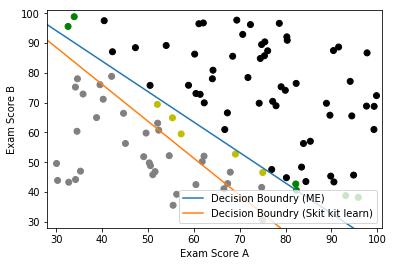

In [20]:
df = pd.read_csv('ex2data1.txt', header=None, names = ["Exam A Score", "Exam B Score", "Admitted"])
x_exam_a = df.values[:, 0]
x_exam_b = df.values[:, 1]
y = df.values[:, 2]

cols = []
for i, e in enumerate(x_exam_a):
    if y_prime.T[i] == y[i]:
        if y_prime.T[i] == 0:
            cols.append('grey')
        else:
            cols.append('black')
    else:
        if y_prime.T[i] == 0:
            cols.append('y')
        else:
            cols.append('g')

## PLOT DECISION BOUNDRY
xx = np.arange(28,102)
theta = [-25.87355624, 0.21193682, 0.20722586]
yy = (-theta[0] - xx*theta[1]) / theta[2]
plt.plot(xx,yy, label='Decision Boundry (ME)')

# Compare with Scikit-learn Logestic regression 
logistic_regression = LogisticRegression()
# X.reshape(-1,1) IS Change [1, 2, 3, 4, 5] ----> [[1], [2], [3], [4]]
X = df.values[:, [0, 1]]
# clf.coef_, clf.intercept_
# 3.89977794 - 0.03844482x1) 0.03101855 = x2
clf = logistic_regression.fit(X, y.ravel())
yy = (3.89977794 - xx*0.03844482) / 0.03101855
plt.plot(xx,yy, label='Decision Boundry (Skit kit learn)')

plt.scatter(x_exam_a, x_exam_b, c=cols)
plt.xlim(28,101)
plt.ylim(28,101)
plt.xlabel('Exam Score A')
plt.ylabel('Exam Score B')
plt.legend(loc=4);


## With Regularization Params

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

In [21]:
# Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.
# load data
# def costReg(theta, X, y, learningRate):
# def gradientReg(theta, X, y, learningRate):
df = pd.read_csv('ex2data2.txt', header=None, names = ["Test A Score", "Test B Score", "Accepted"])

In [22]:
df.sample(10)

,Test A Score,Test B Score,Accepted
82,-0.40956,-0.411550,0
42,0.64459,-0.141080,1
98,0.63882,0.889620,0
60,0.29896,0.619150,0
117,0.63265,-0.030612,0
6,-0.39804,0.034357,1
55,-0.43836,0.217110,1
4,-0.51325,0.465640,1
54,-0.20795,0.173250,1
103,-0.23675,-0.638160,0


In [23]:
df.describe()

,Test A Score,Test B Score,Accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


ValueError: Unknown label type: 'continuous'

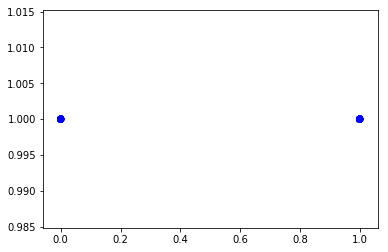

In [35]:
x_test_a = df.values[:, 0]
x_test_b = df.values[:, 1]
y = df.values[:, 2]

cols = ['r' if e == 0 else 'b' for e in y]
plt.scatter(x_test_a, x_test_b, c=cols)

xx = np.arange(-100, 100)
# Compare with Scikit-learn Logestic regression 
logistic_regression = LogisticRegression()
# X.reshape(-1,1) IS Change [1, 2, 3, 4, 5] ----> [[1], [2], [3], [4]]
X = df.values[:, [0, 1]]
# 3.89977794 - 0.03844482x1) 0.03101855 = x2
clf = logistic_regression.fit(X, y.ravel())
clf.coef_, clf.intercept_
yy = (3.89977794 - xx*0.03844482) / 0.03101855
plt.plot(xx,yy, label='Decision Boundry (Skit kit learn)')

plt.xlim(-100,100)
plt.ylim(-100,100)
plt.xlabel('Test Score A')
plt.ylabel('Test Score B')



Text(0,0.5,'Test Score B')

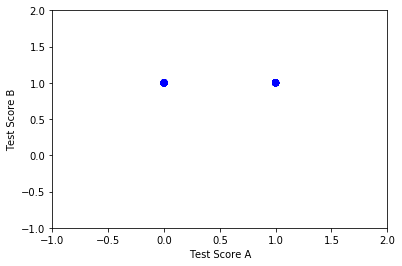

In [36]:
x_test_a = df.values[:, 0]
x_test_b = df.values[:, 1]
y = df.values[:, 2]

cols = ['r' if e == 0 else 'b' for e in y]
plt.scatter(x_test_a, x_test_b, c=cols)

plt.xlim(-1,2)
plt.ylim(-1,2)
plt.xlabel('Test Score A')
plt.ylabel('Test Score B')

In particular, you'll notice that there is no linear decision boundary that will perform well on this data. One way to deal with this using a linear technique like logistic regression is to construct features that are derived from polynomials of the original features. Let's start by creating a bunch of polynomial features.


In [26]:
df = pd.read_csv('ex2data2.txt', header=None, names = ["Test A Score", "Test B Score", "Accepted"])
x_test_a = df["Test A Score"]
x_test_b = df["Test B Score"]
y = df["Accepted"]

df.insert(3, 'One', 1)

#df;

#np.power(x_test_a, 2) * np.power(x_test_a, 1)
degree = 5

for x1_degree in range(degree):
    for x2_degree in range(degree):
        if ((x1_degree == 0) and (x2_degree == 0)):
            continue
        df["F" + str(x1_degree) + str(x2_degree)] = np.power(x_test_a, x1_degree) * np.power(x_test_b, x2_degree)
        

df.drop('Test A Score', axis=1, inplace=True)
df.drop('Test B Score', axis=1, inplace=True)

df.sample(10)


,Accepted,One,F01,F02,F03,F04,F10,F11,F12,F13,...,F30,F31,F32,F33,F34,F40,F41,F42,F43,F44
32,1,1,0.64839,0.420410,0.272589,0.176744,-0.17339,-0.112424,-0.072895,-0.047264,...,-0.005213,-0.003380,-0.002192,-0.001421,-0.000921,0.000904,0.000586,0.000380,0.000246,0.000160
64,0,1,0.50219,0.252195,0.126650,0.063602,0.76555,0.384452,0.193068,0.096957,...,0.448663,0.225314,0.113151,0.056823,0.028536,0.343474,0.172489,0.086622,0.043501,0.021846
104,0,1,-0.36769,0.135196,-0.049710,0.018278,-0.15035,0.055282,-0.020327,0.007474,...,-0.003399,0.001250,-0.000459,0.000169,-0.000062,0.000511,-0.000188,0.000069,-0.000025,0.000009
15,1,1,0.58260,0.339423,0.197748,0.115208,0.32200,0.187597,0.109294,0.063675,...,0.033386,0.019451,0.011332,0.006602,0.003846,0.010750,0.006263,0.003649,0.002126,0.001239
20,1,1,0.59722,0.356672,0.213011,0.127215,-0.60541,-0.361563,-0.215933,-0.128959,...,-0.221896,-0.132521,-0.079144,-0.047266,-0.028228,0.134338,0.080229,0.047915,0.028616,0.017090
114,0,1,0.49488,0.244906,0.121199,0.059979,-0.59389,-0.293904,-0.145447,-0.071979,...,-0.209468,-0.103662,-0.051300,-0.025387,-0.012564,0.124401,0.061564,0.030467,0.015077,0.007461
74,0,1,-0.74050,0.548340,-0.406046,0.300677,0.59274,-0.438924,0.325023,-0.240680,...,0.208254,-0.154212,0.114194,-0.084561,0.062617,0.123440,-0.091408,0.067687,-0.050122,0.037116
7,1,1,-0.19225,0.036960,-0.007106,0.001366,-0.30588,0.058805,-0.011305,0.002173,...,-0.028619,0.005502,-0.001058,0.000203,-0.000039,0.008754,-0.001683,0.000324,-0.000062,0.000012
58,0,1,0.93348,0.871385,0.813420,0.759312,0.18376,0.171536,0.160126,0.149474,...,0.006205,0.005792,0.005407,0.005047,0.004712,0.001140,0.001064,0.000994,0.000928,0.000866
61,0,1,0.75804,0.574625,0.435588,0.330193,0.50634,0.383826,0.290955,0.220556,...,0.129816,0.098405,0.074595,0.056546,0.042864,0.065731,0.049827,0.037771,0.028632,0.021704


In [27]:
# def costReg(theta, X, y, learningRate):
# X is design matrix
# Each row is a sample (so n by m) (n = # of features, m = # of samples)
# First column is all 1s for theta
cols = df.shape[1]
X = df.iloc[:,1:cols]

# y is a m dimensional vector
# NOTE: You need to use matrix so np correctly shapes data
y = df.iloc[:,0:1]

# theta is n+1 dimensional (+1 for element at index 0 which has no X)
theta = np.matrix('0 '* (cols -1))

learningRate = 1
X.shape, theta.shape, y.shape

((118, 25), (1, 25), (118, 1))

In [28]:
def costReg(theta, X, y, learningRate):
    X_theta = theta*X.T
    h = sigmoid(X_theta)
    m = y.size
    y_is_one = -y*np.log(h.T)
    first_term = - np.asscalar((y_is_one + y_is_zero) / m)
    sum_of_squares_theta = np.sum(np.delete(theta, 0).T*np.delete(theta, 0))
    second_term = (learningRate*sum_of_squares_theta)/(2*m)
    return first_term + second_term

def costReg3(theta, X, y, learningRate):
    # Should now be m-dimensional (1, 5000)
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    X_theta = theta*X.T 

    # Should now be m-dimensional (1, 5000)
    h = sigmoid(X_theta) 
    
    # Should be scalar
    y_is_one = np.log(h)*(-y)
    
    # Should be scalar
    y_is_zero =np.log(1-h)*(1 - y)
    
    # Should be scalar
    cost = np.asscalar((y_is_one - y_is_zero) / m)
    
    # Scalar
    theta_without_first_term = x = np.delete(theta, 0)
    # Scalar
    regularization_term = (learningRate * np.sum(np.power(theta_without_first_term, 2)))/(2*m)
    
    return cost + regularization_term

def gradientReg2(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])
    
    return grad

def gradientReg3(theta, X, y, learningRate):
    m, n = X.shape
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)    
    h = sigmoid(theta*X.T)
    diff = h - y.T
    first_term = (diff * X) / m
    reqularization_term = theta*(learningRate/m)
    reqularization_term[0,0] = theta[0, 0]
    return reqularization_term + first_term

In [29]:
costReg3(theta, X, y, learningRate) # 0.6931471805599454
    # Should now be m-dimensional (1, 118)
#X_theta = np.matrix(theta)*np.matrix(X).T 
#X_theta.shape
    # Should now be m-dimensional (1, 5000)h = sigmoid(X_theta) 
    
    # Should be scalar
    #y_is_one = np.log(h)*(-y)
    
    # Should be scalar
    #y_is_zero =np.log(1-h)*(1 - y)
    
    # Should be scalar
    #cost = np.asscalar((y_is_one - y_is_zero) / m)
    
    # Scalar
    #theta_without_first_term = x = np.delete(theta, 0)
    # Scalar
    #regularization_term = (learningRate * np.sum(np.power(theta_without_first_term, 2)))/(2*m)
    
    #return cost + regularization_term

NameError: global name 'm' is not defined

In [30]:
gradientReg2(theta, X, y, learningRate)
# array([8.47457627e-03, 7.77711864e-05, 3.76648474e-02, 2.34764889e-02,
#       3.93028171e-02, 1.87880932e-02, 1.15013308e-02, 8.19244468e-03,
#       3.09593720e-03, 4.47629067e-03, 5.03446395e-02, 7.32393391e-03,
#       1.28600503e-02, 5.83822078e-03, 7.26504316e-03, 1.83559872e-02,
#       2.23923907e-03, 3.38643902e-03, 4.08503006e-04, 1.37054473e-03,
#       3.93486234e-02, 4.32983232e-03, 6.31570797e-03, 2.21859968e-03,
#       2.73345994e-03])

gradientReg3(theta, X, y, learningRate)

matrix([[8.47457627e-03, 7.77711864e-05, 3.76648474e-02, 2.34764889e-02,
         3.93028171e-02, 1.87880932e-02, 1.15013308e-02, 8.19244468e-03,
         3.09593720e-03, 4.47629067e-03, 5.03446395e-02, 7.32393391e-03,
         1.28600503e-02, 5.83822078e-03, 7.26504316e-03, 1.83559872e-02,
         2.23923907e-03, 3.38643902e-03, 4.08503006e-04, 1.37054473e-03,
         3.93486234e-02, 4.32983232e-03, 6.31570797e-03, 2.21859968e-03,
         2.73345994e-03]])

In [31]:
result2 = opt.fmin_tnc(func=costReg2, x0=theta, fprime=gradientReg2, args=(X, y, learningRate))
result2

NameError: name 'costReg2' is not defined

In [32]:
from sklearn import linear_model
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
model.fit(X, y.values.ravel())
model.score(X, y)

0.8220338983050848

In [33]:
# TODO Plot handwritten vs sklearn vs fmin_tnc